## Introduction

Any company in existence today thrives to make a profit. Insurance companies are profitable when the claims that they issue are lesser than the premiums they receive.

This is the real-world problem we are going to tackle today. If there is a method by which the insurance company can predict a person’s hospital bills, they would be able to generate a financial gain.

We have data of about 1338 observations(rows) and 7 features(columns) including age, gender, BMI(Body Mass Index), number of children they have, the region they belong to, and if they are a smoker or a non-smoker. Our task is to uncover a relationship that might exist between a person’s hospital bills and their family conditions, health factors, or location of residence.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading

In [2]:
df = pd.read_csv("https://www.kaggle.com/code/aliphya/insurance-premium-prediction/data?select=insurance.csv#:~:text=calendar_view_week-,insurance.csv,-O")

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Data Understanding

### Ratio of genders

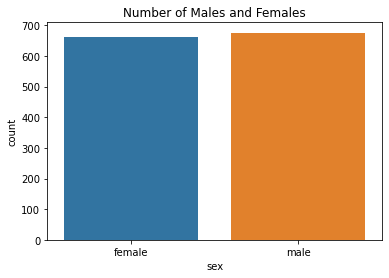

In [4]:
sns.countplot(x='sex', data = df)
plt.title("Number of Males and Females")
plt.show()

We have almost similar count of males and females in the dataset

### Association of Expense v/s Children

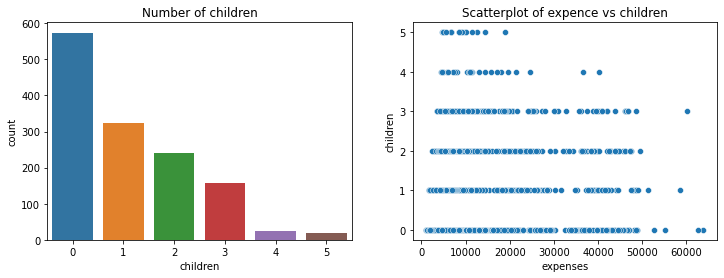

In [5]:
f = plt.figure(figsize=(12,4))
f.add_subplot(121)
sns.countplot(x='children', data=df)
plt.title('Number of children')
f.add_subplot(122)
sns.scatterplot(data=df, x="expenses", y="children")
plt.title('Scatterplot of expence vs children')
plt.show()

The number of persons having more than 3 children is comparatively lesser than those have less than 3 children, no trend is being observed that people with lesser children have lesser medical expense

### Association of Smoker vs Expense

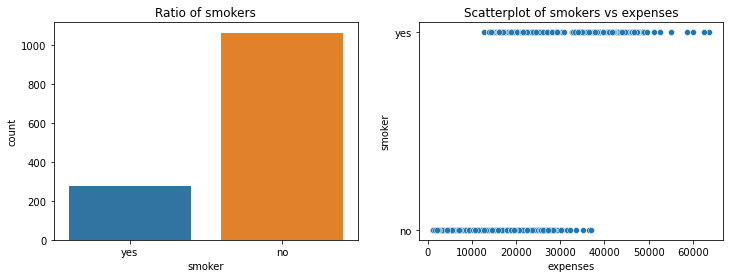

In [6]:
f = plt.figure(figsize=(12,4))
f.add_subplot(121)
sns.countplot(x='smoker', data = df)
plt.title('Ratio of smokers')
f.add_subplot(122)
sns.scatterplot(data=df, x='expenses', y = 'smoker')
plt.title('Scatterplot of smokers vs expenses')
plt.show()

Even though the data has way more number of non smokers than the number of smokers, it is observed that smokers have higher medical expenses, this feature would definitely be useful while predicting premium.

### Association of Region and Expenses

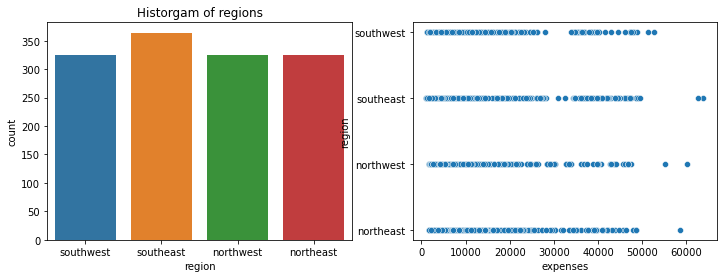

In [7]:
f = plt.figure(figsize = (12,4))
f.add_subplot(121)
sns.countplot(x='region', data = df)
plt.title("Historgam of regions")
f.add_subplot(122)
sns.scatterplot(data=df, x='expenses', y='region')
plt.show()

The dataset has almost same number of people for each region, No trend can be established between different regions and expenses.

### Association of Age Vs Expenses

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

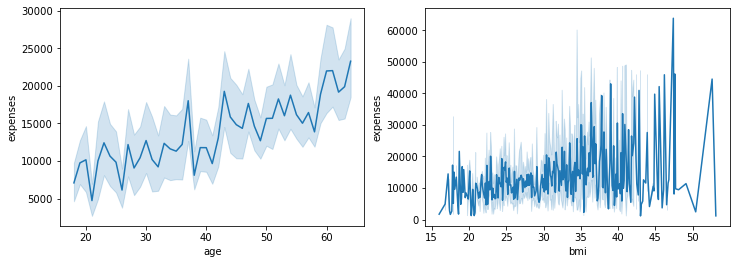

In [8]:
f = plt.figure(figsize=(12,4))
f.add_subplot(121)
sns.lineplot(x='age',y='expenses',data=df)
f.add_subplot(122)
sns.lineplot(x='bmi',y='expenses',data=df)

The trend above shows that medical expenses are lower with lesser age and No particular trend can be established between bmi and expenses

## Data Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df.iloc[:,1] = label.fit_transform(df.iloc[:,1])
df.iloc[:,5] = label.fit_transform(df.iloc[:,5])
df.iloc[:,4] = label.fit_transform(df.iloc[:,4])

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


## Data Visualization

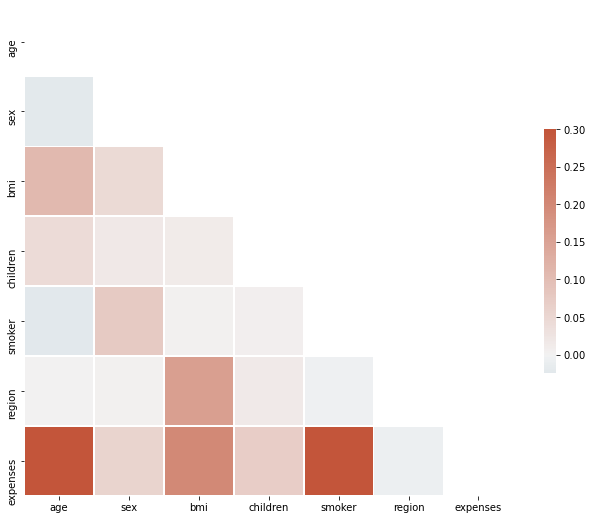

In [11]:
import matplotlib.pyplot as plt
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

The highest correlation can be observed between expenses and age; smoker and age BMI and expenses display a good correlation too. Let us further use these to see how they perform to predict medical expenses.

In [12]:
X = df[['bmi','age','smoker','children']]
Y = df['expenses']

In [13]:
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.25)

## Model Selection

Our problem is a regression problem as we are trying to predict expense which is a real-valued number. We would use DecisionTreeRegressor and LinearRegression models for the above task.

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
regressor = DecisionTreeRegressor(random_state=0)
#cross_val_score(regressor, X_train, y_train, cv=10)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
mse_dt = mean_squared_error(y_test,y_predict,squared=False)
print(mse_dt)

7181.818493860029


In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
#cross_val_score(regressor, X_train, y_train, cv=10)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
mse_dt = mean_squared_error(y_test,y_predict,squared=False)
print(mse_dt)

6255.05529484471


We get a lower mean squared error with Linear Regression than the Decision tree regressor. We can further lower the MSE(mean squared error) or improve the model performance by using hyperparameter tuning methodologies like Grid Search and Random Search.